In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings
warnings.filterwarnings('ignore') 

In [2]:
data = pd.read_csv("titanic.csv") ## reading the file
data

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
## Target variable is Survived which is descrete so we will do Logistic Regression

## Basic Checks

In [4]:
data.head()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
data.tail()

,PassengerId,Survived,Pclass,Name,Gender,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [6]:
data.shape

(891, 12)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Gender       891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
data.describe() ## since STD !=0, so there is no constant features in the data set

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
data.median()

PassengerId    446.0000
Survived         0.0000
Pclass           3.0000
Age             28.0000
SibSp            0.0000
Parch            0.0000
Fare            14.4542
dtype: float64

In [10]:
data.PassengerId.unique() ## this column have unique values so we dropped this column 

array([  1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,  13,
        14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,  26,
        27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,  39,
        40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,  52,
        53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,  65,
        66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,  78,
        79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,  91,
        92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103, 104,
       105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117,
       118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130,
       131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143,
       144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156,
       157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169,
       170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 18

In [11]:
data.Cabin.unique() ## this feature also have Unique values, So we will drop this column 

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'A23', 'B50', 'A26', 'D48',
       'E58', 'C126', 'B71', 'B51 B53 B55', 'D49', 'B5', 'B20', 'F G63',
       'C62 C64',

In [12]:
data.Ticket.unique() ## this feature also have Unique values, So we will drop this column 

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295', 'A/4. 39886', 'PC 17572', '2926',
       '113509', '19947', 'C.A. 31026', '2697', 'C.A. 34651', 'CA 2144',
       '2669', '113572', '36973', '347088', 'PC 17605', '2661',
       'C.A. 29395', 'S.P. 3464', '3101281', '315151', 'C.A. 33111',
       'S.O.C. 14879', '2680', '1601', '348123', '349208', '374746',
       '248738', '364516', '345767', '345779', '330932', '113059',
       'SO/C 14885', '31012

In [13]:
data_new= data.drop(['PassengerId','Cabin','Ticket','Name'],axis=1)
data_new.head()

,Survived,Pclass,Gender,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [14]:
##Insights:

## Gender and Embarked is Categorical data
## Survived, Pclass, SibSp are discrete data
## Age and Fare is continuous data

## line plot for continuous and categorical features 

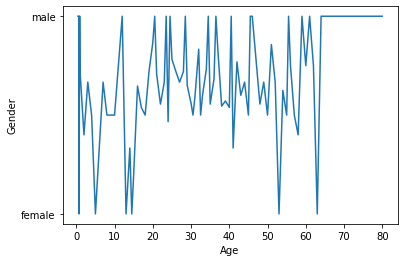

In [15]:
sns.lineplot(x='Age',y='Gender',data=data_new,ci=None)
plt.show()

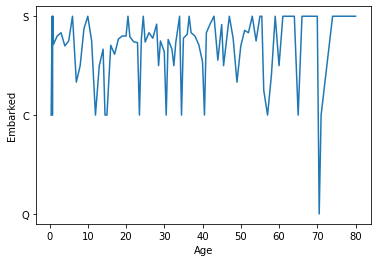

In [16]:
sns.lineplot(x='Age',y='Embarked',data=data_new,ci=None)
plt.show()

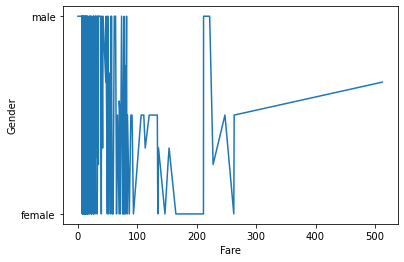

In [17]:
sns.lineplot(x='Fare',y='Gender',data=data_new,ci=None)
plt.show()

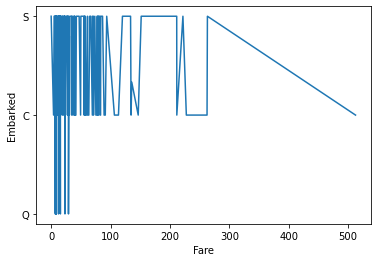

In [18]:
sns.lineplot(x='Fare',y='Embarked',data=data_new,ci=None)
plt.show()

## bar plot for categorical and continuous data

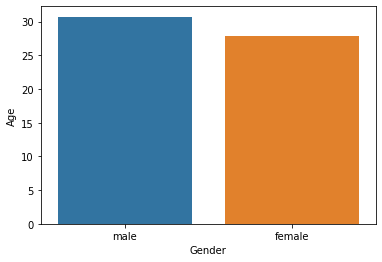

In [19]:
sns.barplot(x='Gender',y='Age',data=data_new,ci=None)
plt.show()

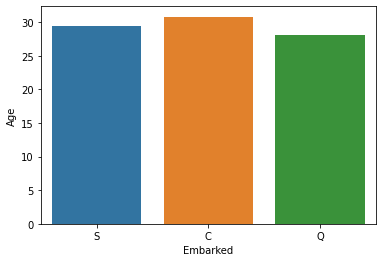

In [20]:
sns.barplot(x='Embarked',y='Age',data=data_new,ci=None)
plt.show()

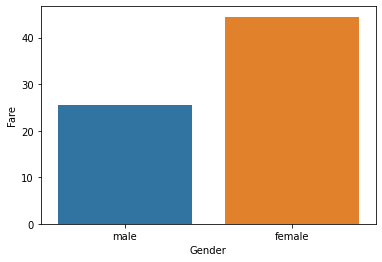

In [21]:
sns.barplot(x='Gender',y='Fare',data=data_new,ci=None)
plt.show()

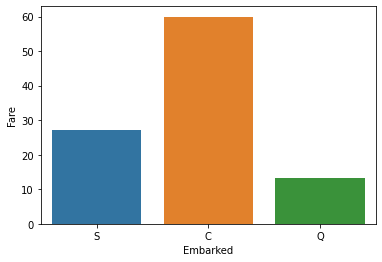

In [22]:
sns.barplot(x='Embarked',y='Fare',data=data_new,ci=None)
plt.show()

## Count Plot for Categorical data

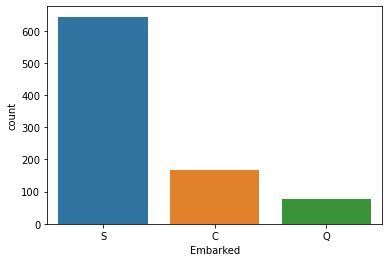

In [23]:
sns.countplot(x='Embarked',data=data_new)
plt.show()

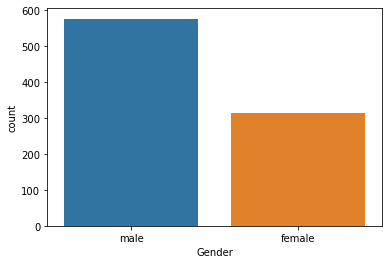

In [24]:
sns.countplot(x='Gender',data=data_new)
plt.show()

## Box plot for categorical and numerical data

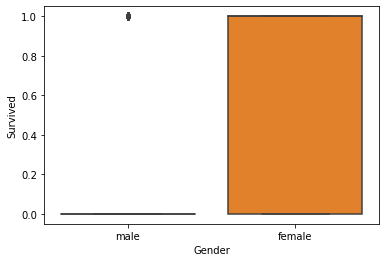

In [25]:
sns.boxplot(x='Gender',y='Survived',data=data_new)
plt.show()

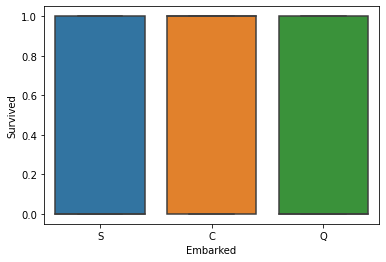

In [26]:
sns.boxplot(x='Embarked',y='Survived',data=data_new)
plt.show()

In [27]:
data_num=data_new.drop(['Gender','Embarked',],axis=1)
data_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,NaN,1,2,23.4500
889,1,1,26.0,0,0,30.0000


## Box plot for Numerical data

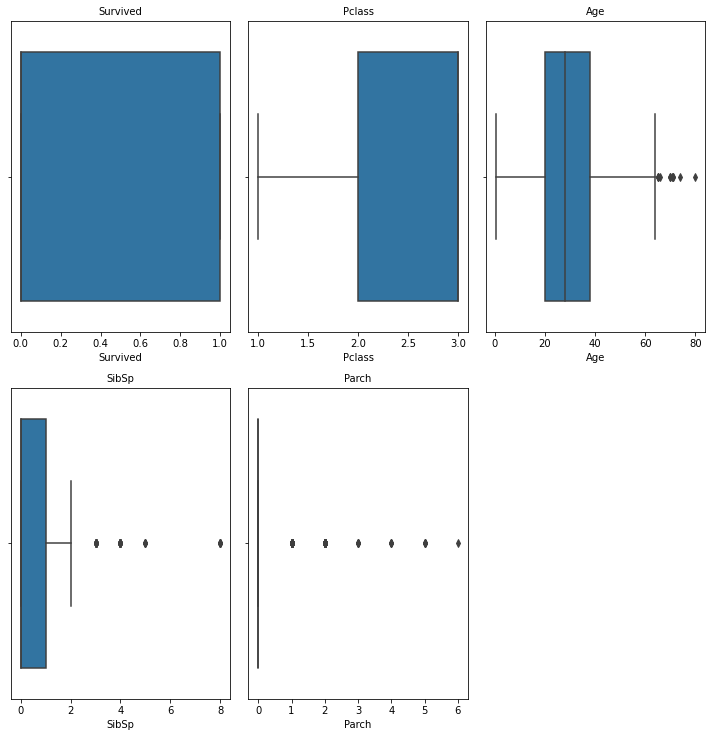

In [28]:
plt.figure(figsize=(10,15), facecolor='white') #To set canvas 
plotnumber=1
for column in data_num:#accessing the columns 
    if plotnumber<=5:
        ax = plt.subplot(3,3,plotnumber)#plotting 4 graph
        sns.boxplot(data_new[column]) # BOXplot
        plt.title(column,fontsize=10)
        plotnumber+=1#counter increment
#plt.show()
plt.tight_layout()

## Age, Sibsp, Parch has outliers

## Violin plot for categotical and Descrete data

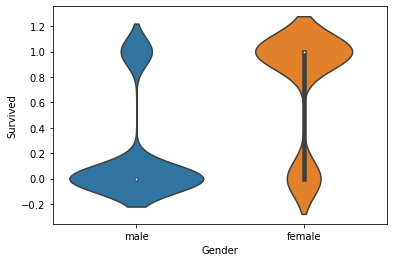

In [29]:
sns.violinplot(x='Gender',y='Survived',data=data_new)
plt.show()

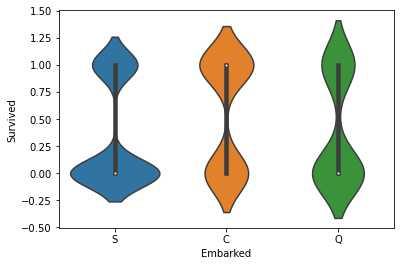

In [30]:
sns.violinplot(x='Embarked',y='Survived',data=data_new)
plt.show()

## Stripped plot for Categorical and Continuous data

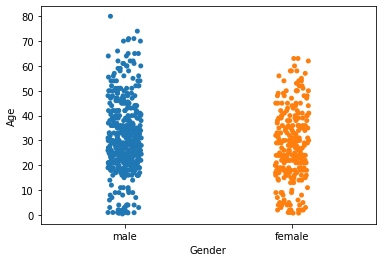

In [31]:
sns.stripplot(x='Gender',y='Age',data=data_new)
plt.show()

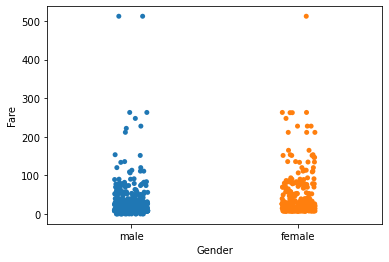

In [32]:
sns.stripplot(x='Gender',y='Fare',data=data_new)
plt.show()

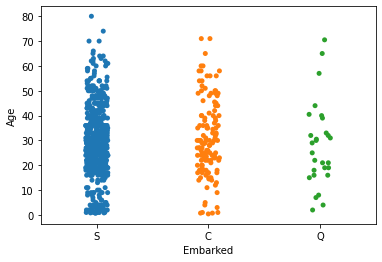

In [33]:
sns.stripplot(x='Embarked',y='Age',data=data_new)
plt.show()

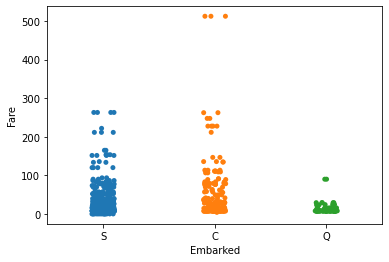

In [34]:
sns.stripplot(x='Embarked',y='Fare',data=data_new)
plt.show()

## Hist plot for continuous data

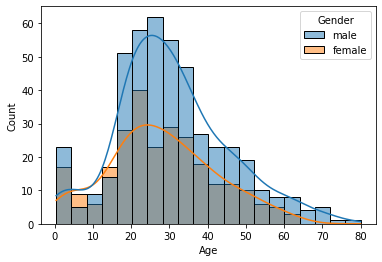

In [35]:
sns.histplot(x='Age',hue='Gender',data=data_new,kde=True)
plt.show()

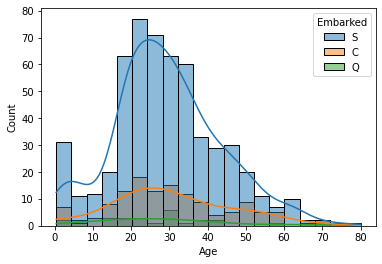

In [36]:
sns.histplot(x='Age',hue='Embarked',data=data_new,kde=True)
plt.show()

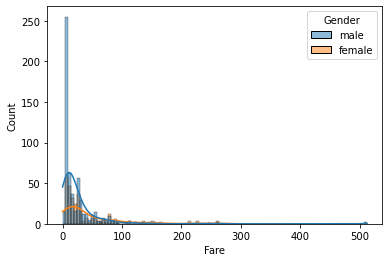

In [37]:
sns.histplot(x='Fare',hue='Gender',data=data_new,kde=True)
plt.show()

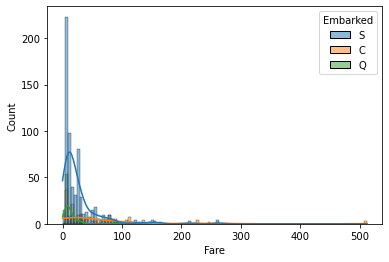

In [38]:
sns.histplot(x='Fare',hue='Embarked',data=data_new,kde=True)
plt.show()

## Categorical Plot for Categorical and Discrete data

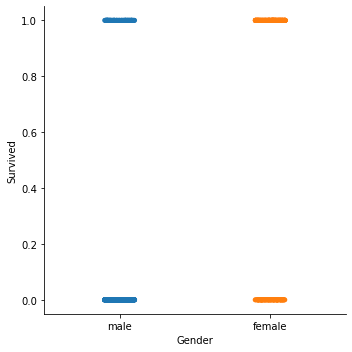

In [39]:
sns.catplot(x='Gender',y='Survived',data=data_new)
plt.show()

## by default catpot give Scatter Plot

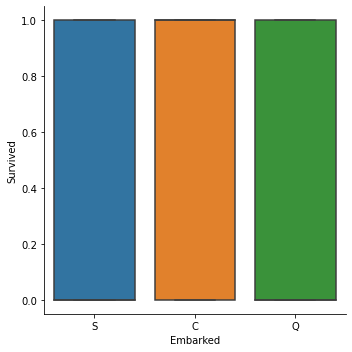

In [40]:
sns.catplot(x='Embarked',y='Survived',data=data_new,kind='box')
plt.show()

## by kind parameter we can define which type of plot we want

In [41]:
## Pair Plot for Numerical data

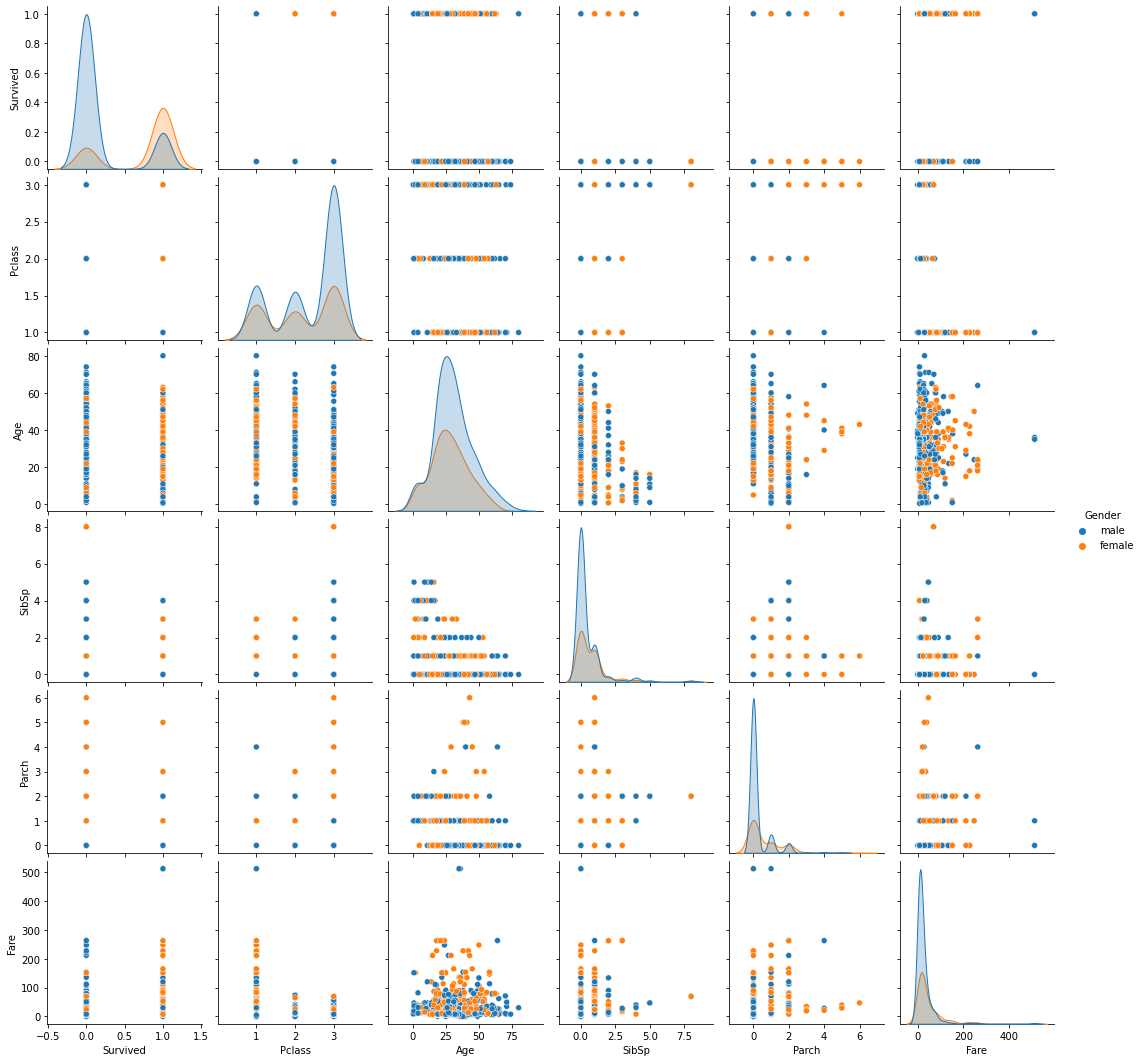

In [42]:
sns.pairplot(data=data_new,hue='Gender')
plt.show()

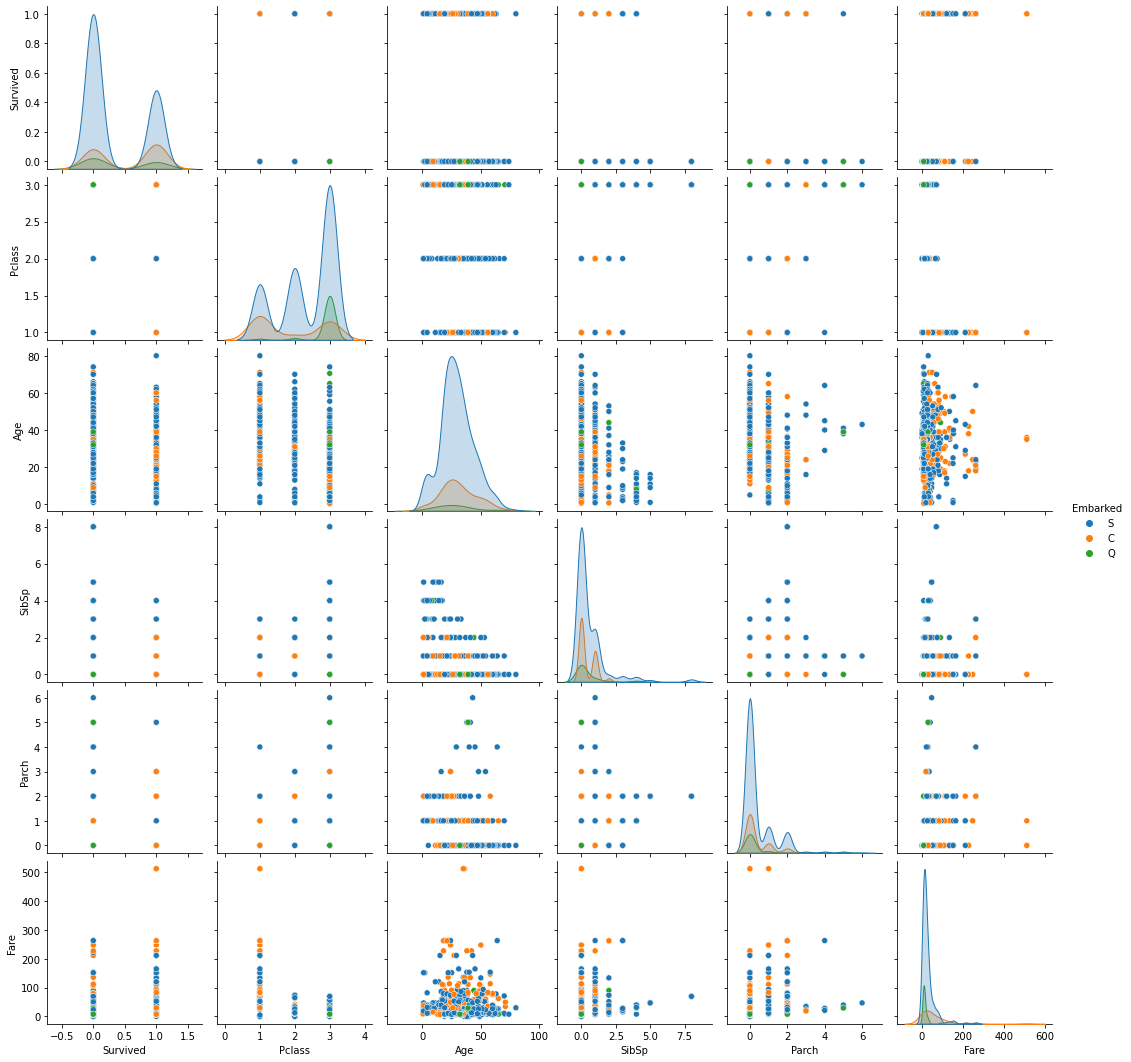

In [43]:
sns.pairplot(data=data_new,hue='Embarked')
plt.show()

In [44]:
data_num.isnull().sum() ## here we have MISSING VALUES in Age only,so we have to impute it

Survived      0
Pclass        0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

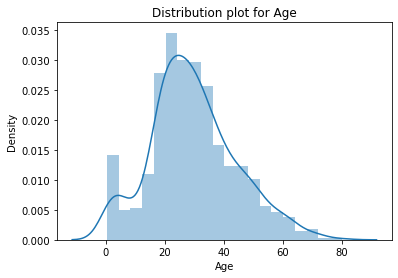

In [45]:
## positive Skewness means the tail of the distribution is longer towards the right hand side of the curve
## the mean is the largest, while the mode is the smallest.
## here mean is greater than median and mode
## there is Positive Skewness in Age 

sns.distplot(data_num.Age)
plt.title("Distribution plot for Age")
plt.show()

## Since data is skewed in Age column, so we will replace the missing values of Age with median of Age

In [46]:
data_num['Age']=data_num['Age'].fillna(value=data_num['Age'].median())
data_num

,Survived,Pclass,Age,SibSp,Parch,Fare
0,0,3,22.0,1,0,7.2500
1,1,1,38.0,1,0,71.2833
2,1,3,26.0,0,0,7.9250
3,1,1,35.0,1,0,53.1000
4,0,3,35.0,0,0,8.0500
...,...,...,...,...,...,...
886,0,2,27.0,0,0,13.0000
887,1,1,19.0,0,0,30.0000
888,0,3,28.0,1,2,23.4500
889,1,1,26.0,0,0,30.0000


In [47]:
data_num.isnull().sum() 

Survived    0
Pclass      0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [48]:
##Skweness and Kurtosis test i.e check for normality
## Skewness is used to measure the level of asymmetry in our graph.
## It is the measure of asymmetry that occurs when our data deviates from the norm
## Skewness is used to denote the horizontal pull on the data.
## -0.5 and 0.5, the distribution of the value is almost symmetrical(Mode = Median = Mean)
## -1 and -0.5, the data is negatively skewed,The skewness is moderate.(Mode > Median > Mean.)
##  0.5 to 1, the data is positively skewed. The skewness is moderate.(Mean > Median > Mode)
## If the skewness is lower than -1 (negatively skewed) or greater than 1 (positively skewed), the data is highly skewed
## negative skewness means the tail of the distribution is longer towards the left hand side of the curve
## positive Skewness means the tail of the distribution is longer towards the right hand side of the curve

from scipy.stats import skew  
print("skewness for Age is= ",skew(data_num.Age)) 

## Here distribution is symmetrical

skewness for Age is=  0.5093852558219663


In [49]:
# Kurtosis is used to find the presence of outliers in our data. It gives us the total degree of outliers present.
# Kurtosis is used to find the vertical pull or the peak's height. 
## A kurtosis greater than 3 will indicate Positive Kurtosis.
## For Positive Kurtosis, the values of kurtosis will range from 3 to infinity.
## A kurtosis less than 3 will mean a negative kurtosis.
## For Negative Kurtosis, the values kurtosis will range from  -2 to infinity.
#  The greater the value of kurtosis, the higher the peak. 

from scipy.stats import kurtosis
print("Kurtosis for Age is= ",kurtosis(data_num.Age))

## Age feature has Negative Kurtosis

Kurtosis for Age is=  0.9815760369363544


<AxesSubplot:>

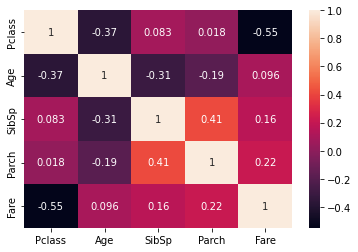

In [50]:
cor=data_num.corr()
sns.heatmap(data_new.drop('Survived',axis=1).corr(),annot=True)

## no features are highly correlated hence we dont remove any feature

<AxesSubplot:>

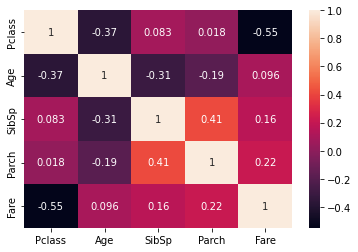

In [51]:
cor=data_new.corr()
sns.heatmap(data_new.drop('Survived',axis=1).corr(),annot=True)

In [52]:
## checking for balanced data set
data_num.Survived.value_counts()

## This is unbalanced data set so we will not rely on accuracy 

0    549
1    342
Name: Survived, dtype: int64

In [53]:
x=data_num.iloc[:,1:]
y=data_num.Survived

In [54]:
x

,Pclass,Age,SibSp,Parch,Fare
0,3,22.0,1,0,7.2500
1,1,38.0,1,0,71.2833
2,3,26.0,0,0,7.9250
3,1,35.0,1,0,53.1000
4,3,35.0,0,0,8.0500
...,...,...,...,...,...
886,2,27.0,0,0,13.0000
887,1,19.0,0,0,30.0000
888,3,28.0,1,2,23.4500
889,1,26.0,0,0,30.0000


In [55]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [56]:
## Standard scaling 
from sklearn.preprocessing import StandardScaler 
scalar = StandardScaler()## objet creation
X_scaled = scalar.fit_transform(x)# scaling independent variables
X_scaled

array([[ 0.82737724, -0.56573646,  0.43279337, -0.47367361, -0.50244517],
       [-1.56610693,  0.66386103,  0.43279337, -0.47367361,  0.78684529],
       [ 0.82737724, -0.25833709, -0.4745452 , -0.47367361, -0.48885426],
       ...,
       [ 0.82737724, -0.1046374 ,  0.43279337,  2.00893337, -0.17626324],
       [-1.56610693, -0.25833709, -0.4745452 , -0.47367361, -0.04438104],
       [ 0.82737724,  0.20276197, -0.4745452 , -0.47367361, -0.49237783]])

In [57]:
## creating training and testing data
from sklearn.model_selection import train_test_split 
x_train,x_test,y_train,y_test = train_test_split(X_scaled,y, test_size= 0.25,random_state = 20)#splitting data into train and test

In [58]:
##Model creation
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression()#object creation of logistic regression
    
log_reg.fit(x_train,y_train)#training model with training data

LogisticRegression()

In [59]:
y_train_predict=log_reg.predict(x_train)# predicting y_train  
y_train_predict

array([1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [60]:
y_test_predict = log_reg.predict(x_test) # testing model 
y_test_predict

array([0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0], dtype=int64)

In [61]:
y_train.shape # to know the shape of y_train (rows and columns)

(668,)

In [62]:
y_test.shape # to know the shape of y_test (rows and columns)

(223,)

In [63]:
# Evaluating the model
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,precision_score,recall_score,f1_score,classification_report

In [64]:
## calculating accuracy for training set
accuracy = accuracy_score(y_train,y_train_predict)# model traning accuracy  ... true positive, true negative
accuracy

## Accuracy is less than 80% for training data set, this is may be due to unbalanced data set 

0.7005988023952096

In [65]:
accuracy = accuracy_score(y_test,y_test_predict)# model testing accuracy  
accuracy

## Accuracy is less than 80% for testing data set, this is may be due to unbalanced data set

0.7219730941704036

## Since our model does not performs well with both testing and training data so our model is UNDERFITTING..
## This may be due to Unbalanced data set.

In [66]:
# Precison
Precision = precision_score(y_test,y_test_predict)# the number of true positive divided by the total number of positive prediction
Precision

## Our model has a precision of 0.65, in other words, out of total predicted positives, 70% are actually positives.

0.6557377049180327

In [67]:
# Recall (recall varies from 0.0 to 1.0)
# Note: A model that produces no false negatives has a recall of 1.0

Recall = recall_score(y_test,y_test_predict)# the total number of positive results how many positives were correctly predicted by the model.
Recall

## Our model has a recall of 0.49, in other words, out of total actual positive values, model has predicted positives is only 52%

0.49382716049382713

In [68]:
# F1 Score
F1_Score = f1_score(y_test,y_test_predict)# when precision and recall both are important
F1_Score

0.5633802816901409

In [69]:
##confusion matrix
## pd.crosstab(y_test, y_pred) ---confusion matrix using pandas
confusion_matrix(y_test, y_test_predict) ##--- confusion matrix using sklearn.metrices

## Misclassifications (FP,FN): 21 and 41
## Correctly classified (TP,TN) : 40,121
## True Negative (TN): 121
## False Positve (FP):21
## False Negative (FN):41
## True Positive (TP) :40  

array([[121,  21],
       [ 41,  40]], dtype=int64)

In [70]:
pd.crosstab(y_test, y_test_predict) ##---confusion matrix using pandas

col_0,0,1
Survived,,
0,121,21
1,41,40


In [71]:
report=classification_report(y_test, y_test_predict)  
print(report)

## Classification Report will give precision,recall,f1 scores and accuracy for each label separately  
## It will give precision,recall,f1 scores for each label separately.
## 142 is total no of data points classified as class '0' out of total no of records in test data
## 81 is total no of data points classified as class '1' out of total no of records in test data
## 0.75 is the precision value for class '0' data points 
## 0.66 is the precision value for class '1' data points
## 0.70 is the macro avg for prcision value for both classes '0' and '1' 
## 0.71 is the weighted avg for prcision value for both classes '0' and '1'
## 0.72 is the accuracy score for test data 
## 223 is total no of records in test data 
######### Smilarly for recall and f1_score

              precision    recall  f1-score   support

           0       0.75      0.85      0.80       142
           1       0.66      0.49      0.56        81

    accuracy                           0.72       223
   macro avg       0.70      0.67      0.68       223
weighted avg       0.71      0.72      0.71       223



In [72]:
# Area Under Curve
auc = roc_auc_score(y_test, y_test_predict)
auc

## Which ever Algorithm gives largest value of AUC for any model, that model will be the BEST MODEL

0.6729699182750826

## ROC PLOT

In [73]:
log_reg.predict_proba(x_test)

## This gives the probability of each data points to lie in '0' class or '1' class
## 0.78444517 is the probability of 1st data point to lie in '0' class
## 0.21555483 is the probability of 1st data point to lie in '1' class
## So for 1st data point, the probability to lie in '0' class is more, so it will be classified as '0' class
## Similarly for other data points

array([[0.78444517, 0.21555483],
       [0.58141689, 0.41858311],
       [0.42791904, 0.57208096],
       [0.70778071, 0.29221929],
       [0.49962611, 0.50037389],
       [0.43275517, 0.56724483],
       [0.70201979, 0.29798021],
       [0.83154189, 0.16845811],
       [0.39320781, 0.60679219],
       [0.79185869, 0.20814131],
       [0.33328498, 0.66671502],
       [0.68783834, 0.31216166],
       [0.2729826 , 0.7270174 ],
       [0.90951745, 0.09048255],
       [0.52331993, 0.47668007],
       [0.8237612 , 0.1762388 ],
       [0.51407807, 0.48592193],
       [0.31856885, 0.68143115],
       [0.49333529, 0.50666471],
       [0.6656993 , 0.3343007 ],
       [0.29236178, 0.70763822],
       [0.54600081, 0.45399919],
       [0.53936199, 0.46063801],
       [0.71645008, 0.28354992],
       [0.18357434, 0.81642566],
       [0.23420204, 0.76579796],
       [0.84201489, 0.15798511],
       [0.57221732, 0.42778268],
       [0.66337539, 0.33662461],
       [0.63180793, 0.36819207],
       [0.

In [74]:
## Prediciting the probabilities of class 1
probs=log_reg.predict_proba(x_test)[:,1]
probs

array([0.21555483, 0.41858311, 0.57208096, 0.29221929, 0.50037389,
       0.56724483, 0.29798021, 0.16845811, 0.60679219, 0.20814131,
       0.66671502, 0.31216166, 0.7270174 , 0.09048255, 0.47668007,
       0.1762388 , 0.48592193, 0.68143115, 0.50666471, 0.3343007 ,
       0.70763822, 0.45399919, 0.46063801, 0.28354992, 0.81642566,
       0.76579796, 0.15798511, 0.42778268, 0.33662461, 0.36819207,
       0.23965073, 0.21437245, 0.06109481, 0.67293303, 0.53970317,
       0.21417699, 0.34760954, 0.91294145, 0.18493884, 0.22472229,
       0.24028596, 0.27605316, 0.19119926, 0.36028308, 0.30412691,
       0.3051464 , 0.23370864, 0.28171761, 0.93306361, 0.68987852,
       0.51896684, 0.68673309, 0.84136075, 0.59899263, 0.28264673,
       0.40763642, 0.31615594, 0.22638491, 0.97877255, 0.12264553,
       0.49259893, 0.52310586, 0.2676984 , 0.24028596, 0.24044247,
       0.81472497, 0.19928506, 0.66287542, 0.31475815, 0.73815705,
       0.91328865, 0.66691768, 0.33003097, 0.38943141, 0.63256

In [75]:
## Defining the threshold limit
def predict_threshold (model,X_test,thresholds):
    return np.where(model.predict_proba(X_test)[:,1]>thresholds, 1, 0)

#checking where probability of class 1 is greater than threshold

In [76]:
import numpy as np
from sklearn.metrics import confusion_matrix

for thr in np.arange(0,1.0,0.1):# it will create matrix /array from range 0 to 1 with step 0.1
    y_predict = predict_threshold(log_reg,x_test,thr)# it will check result  for  each threshold from 0 to 1
    print("Threshold :",thr)#printing threshold
    print(confusion_matrix(y_test,y_predict))# confusion matrix for each prediction

Threshold : 0.0
[[  0 142]
 [  0  81]]
Threshold : 0.1
[[  2 140]
 [  0  81]]
Threshold : 0.2
[[ 18 124]
 [  1  80]]
Threshold : 0.30000000000000004
[[79 63]
 [18 63]]
Threshold : 0.4
[[108  34]
 [ 29  52]]
Threshold : 0.5
[[121  21]
 [ 41  40]]
Threshold : 0.6000000000000001
[[130  12]
 [ 49  32]]
Threshold : 0.7000000000000001
[[135   7]
 [ 62  19]]
Threshold : 0.8
[[137   5]
 [ 74   7]]
Threshold : 0.9
[[141   1]
 [ 78   3]]


In [78]:
## visualizing the roc plot
def plot_roc_curve(fpr, tpr):# function to plot roc curve
    plt.plot(fpr, tpr, color='orange', label='ROC')#line plot between fpr and tpr
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')# assigning name to  x axis
    plt.ylabel('True Positive Rate')# assigning name to y axis
    plt.title('Receiver Operating Characteristic (ROC) Curve')#assigning name to curve  
    plt.legend()#area describing the elements of the graph
    plt.show()#to show graph without location

In [79]:
from sklearn.metrics import roc_auc_score,roc_curve ## used to compare multiple models

auc = roc_auc_score(y_test, probs) #roc curve 
print('AUC: %.2f' % auc)

AUC: 0.75


In [80]:
fpr, tpr, thresholds = roc_curve(y_test, probs)
#Increasing false positive rates such that element i is the false positive rate of predictions with score >= thresholds[i].
#Increasing true positive rates such that element i is the true positive rate of predictions with score >= thresholds[i].
#Decreasing thresholds on the decision function used to compute fpr and tpr

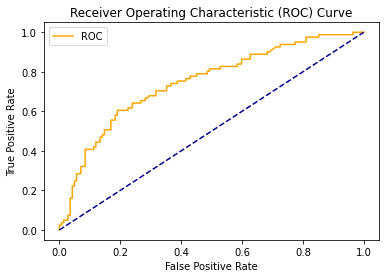

In [81]:
import matplotlib.pyplot as plt
plot_roc_curve(fpr, tpr)#plotting ruc curve

## Insights

In [ ]:
## Since in ROC Curve, the curve is above the straight line joining two end points of the curve, Hence our model is Good